In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
file_list = os.listdir("results-0.01/")
csv_files = [file for file in file_list if file.endswith('.csv')]

In [4]:
dfs = map(lambda file: pd.read_csv("results-0.01/"+file, sep=';'), csv_files)
df = pd.concat(dfs, axis=1)

In [5]:
frames = []
for file in csv_files:
    frames.append(pd.read_csv("results-0.01/"+file,sep=';'))
df = pd.concat(frames)
df = df.reset_index()

In [6]:
df = df[df.SurveyNr != 1]
df = df.reset_index()

In [7]:
df["is_sim_survey"] = np.where(df['OpinionSim'] == df['OpinionSurvey'], 1, 0)

In [8]:
df0 = df.groupby(['Question', 'Delta'])['is_sim_survey'].mean().reset_index()

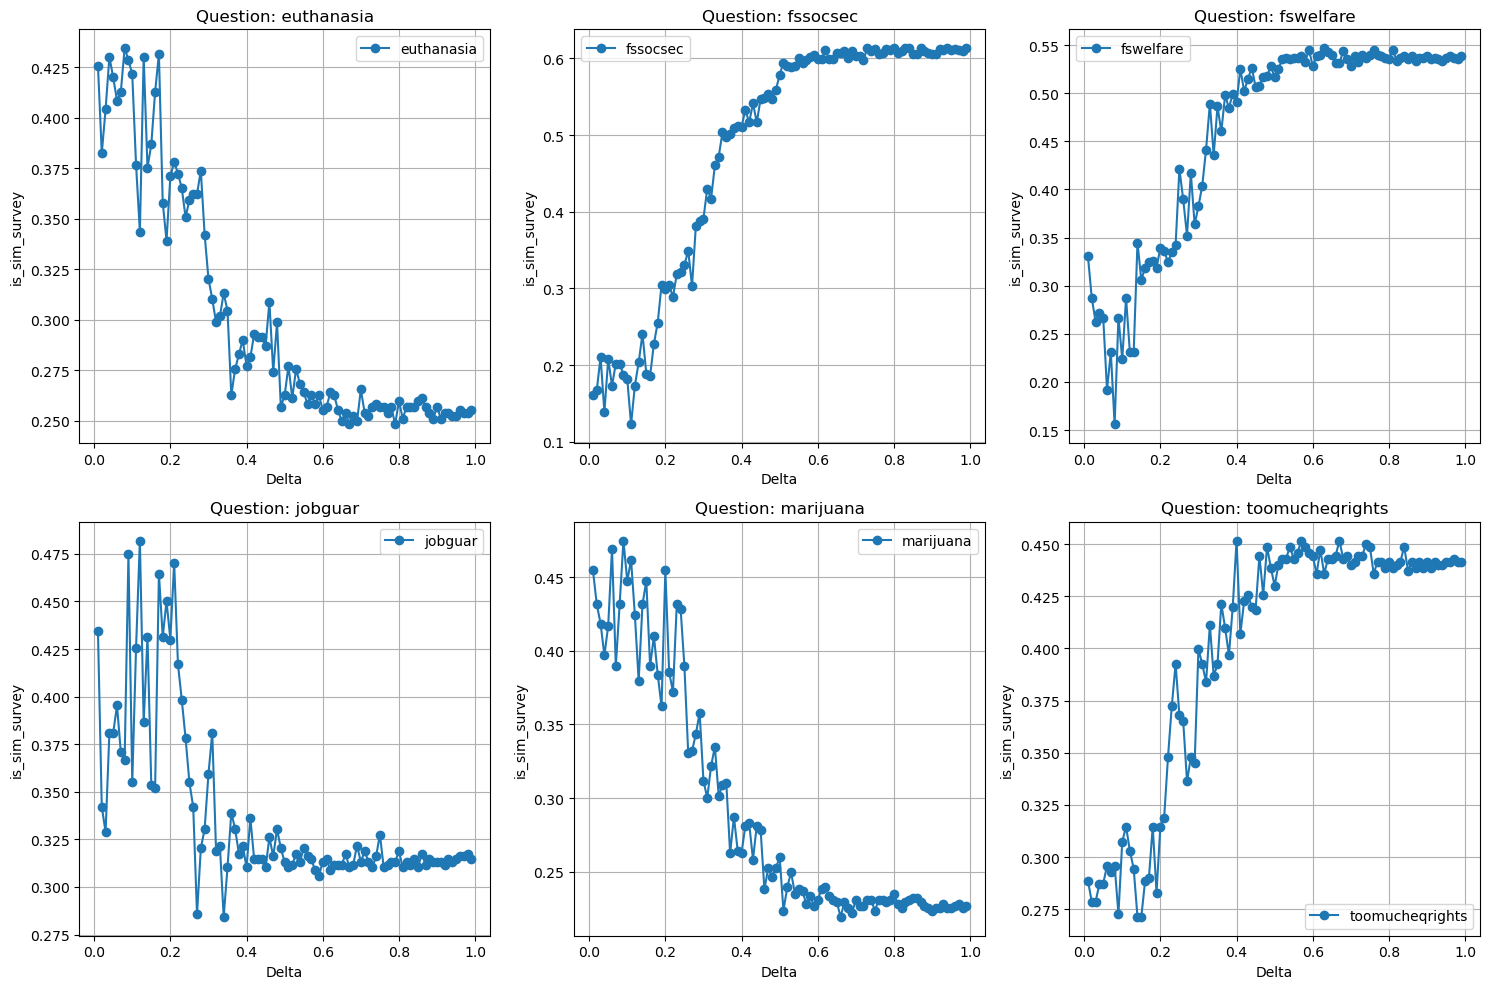

In [9]:
questions = df0['Question'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  

for i, question in enumerate(questions):
    row = i // 3
    col = i % 3
    
    subset = df0[df0['Question'] == question]
    
    axes[row, col].plot(subset['Delta'], subset['is_sim_survey'], marker='o', label=question)
    
    axes[row, col].set_title(f'Question: {question}')
    axes[row, col].set_xlabel('Delta')
    axes[row, col].set_ylabel('is_sim_survey')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout()

plt.show()

In [10]:
df1 = df.groupby(['Question', "OpinionSurvey"])['is_sim_survey'].count().reset_index()

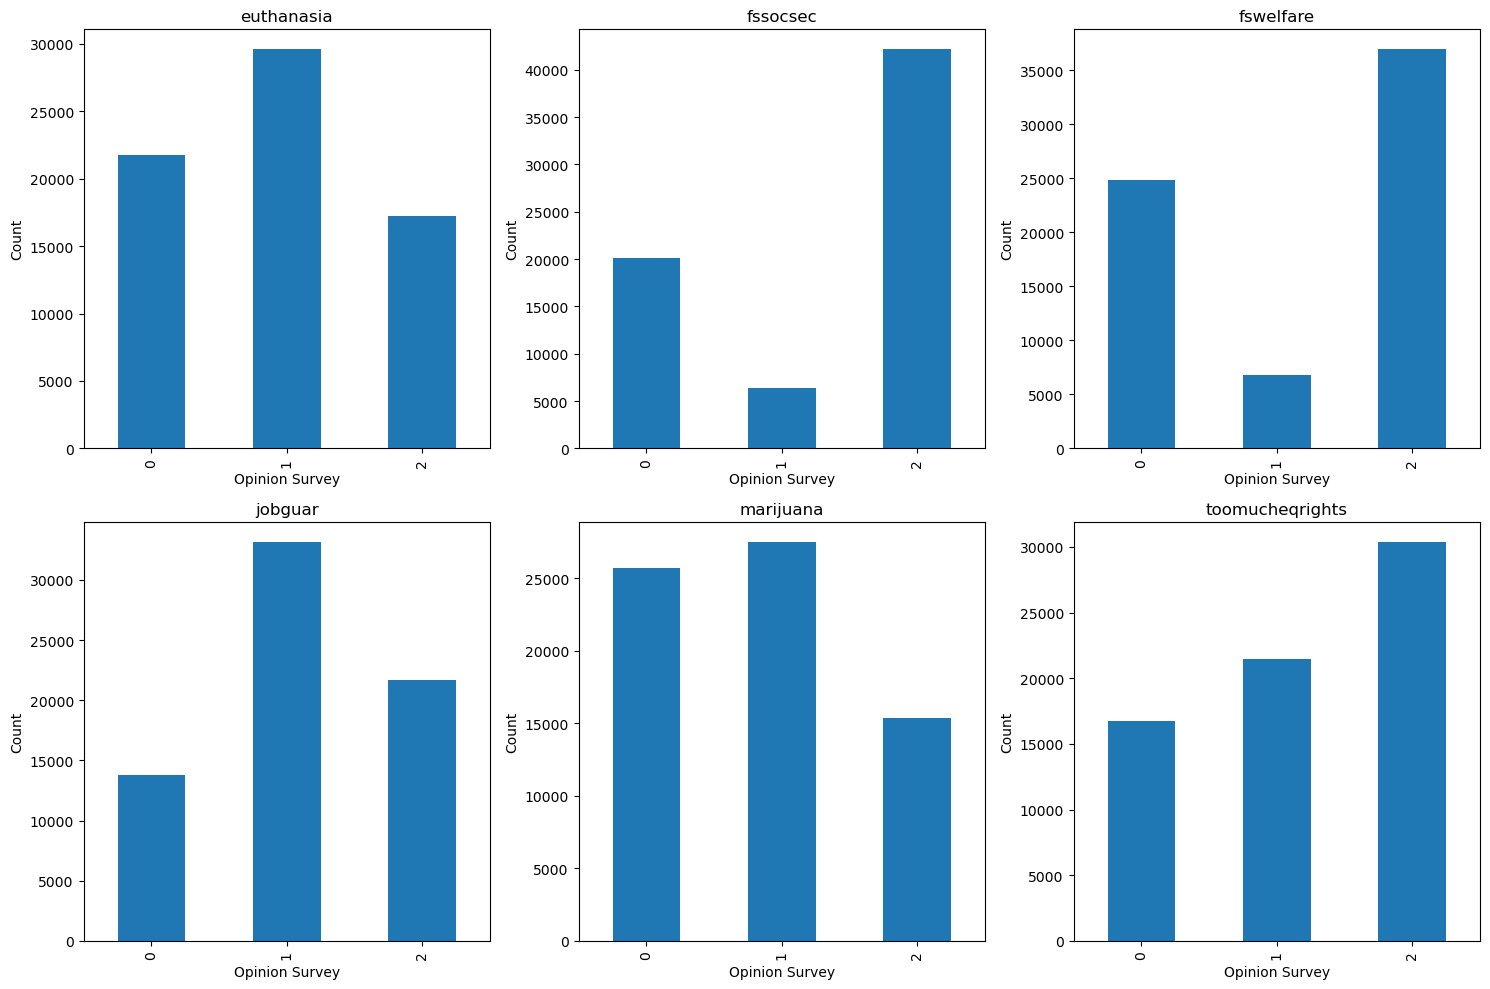

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

questions = df1['Question'].unique()

for i, question in enumerate(questions):
    ax = axes.flatten()[i]
    data_subset = df1[df1['Question'] == question]
    data_subset.plot(kind='bar', x='OpinionSurvey', y='is_sim_survey', ax=ax, legend=False)
    ax.set_title(question)
    ax.set_ylabel('Count')
    ax.set_xlabel('Opinion Survey')

plt.tight_layout()
plt.show()